# Topo - Extract elevations from a DEM
O.KAUFMANN, 2021.

In [1]:
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from bootsoff.topo import topo

## Read the DEM

In [2]:
dem=rio.open('./data_gis/example_DEM_100m_srtm_mga55.asc')

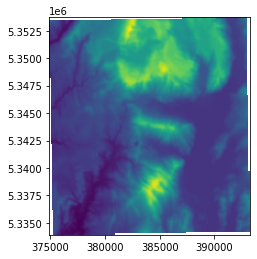

<AxesSubplot:>

In [3]:
show(dem)

## Get the stations form a geopackage layer

In [4]:
stations = gpd.read_file('./data_gis/test.gpkg', layer='bouguer')

(374948.557126863, 393248.557126863, 5333919.16291853, 5353719.16291853)

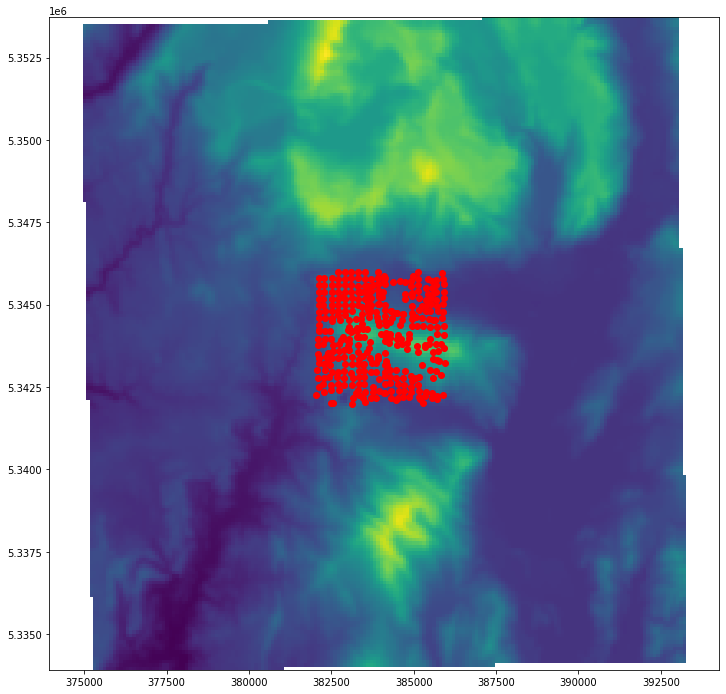

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
show(dem, ax=ax)
stations.plot(ax=ax, color='r')
ax.axis('equal')

## Extract elevations

In [6]:
stations['Z'] = [i[0] for i in dem.sample(stations[['X', 'Y']].values)]

In [7]:
stations.head()

,X,Y,dg,geometry,Z
0,384302.181339,5.344813e+06,-24.61,POINT (384302.181 5344813.181),414.210938
1,384472.181705,5.344743e+06,-24.64,POINT (384472.182 5344743.181),398.322052
2,384672.182200,5.344713e+06,-24.72,POINT (384672.182 5344713.181),424.723907
3,384966.182873,5.344624e+06,-25.42,POINT (384966.183 5344624.180),401.536011
4,384742.183147,5.345333e+06,-24.14,POINT (384742.183 5345333.182),314.284149


(374948.557126863, 393248.557126863, 5333919.16291853, 5353719.16291853)

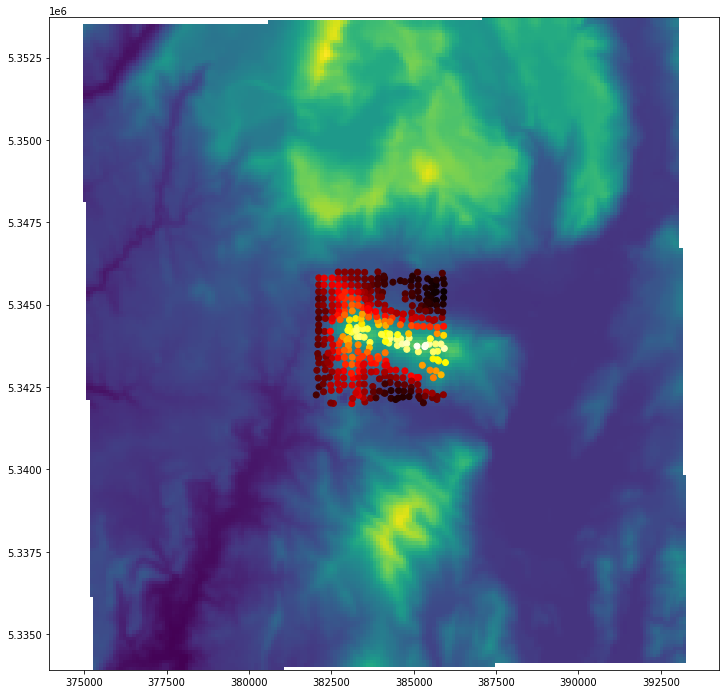

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
show(dem, ax=ax)
stations.plot(column='Z', ax=ax, cmap='hot')
ax.axis('equal')